# Seção 4: Classificação binária - base breast cancer
Os dados utilizados neste notebook foram tirados da página [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

## Importação das bibliotecas

In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, confusion_matrix

## Importação das bases

In [2]:
df_inputs = pd.read_csv("./99_bases/entradas_breast.csv")
df_outputs = pd.read_csv("./99_bases/saidas_breast.csv")

print(f"""- Formato do dataframe df_inputs: {df_inputs.shape}
- Formato do dataframe df_outputs: {df_outputs.shape}""")

- Formato do dataframe df_inputs: (569, 30)
- Formato do dataframe df_outputs: (569, 1)


### Análise das bases importadas:

In [3]:
# df_description = pd.DataFrame()
# for feature in df_inputs.columns:
    

### Pre-processamento

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_inputs, df_outputs, test_size=.25)

print(f"""{X_train.shape} e {y_train.shape}
{X_test.shape} e {y_test.shape}""")

(426, 30) e (426, 1)
(143, 30) e (143, 1)


### Modelo

In [5]:
model = Sequential()

# Camada de entrada e intermediária
model.add(Dense(units=16, activation='relu', kernel_initializer='random_uniform', input_dim=30))

# Camada de saída
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(X_train, y_train, batch_size=10, epochs=100, verbose=False);

In [6]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred>.5,1,0)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

precision    recall  f1-score   support

           0       0.86      0.86      0.86        49
           1       0.93      0.93      0.93        94

    accuracy                           0.90       143
   macro avg       0.89      0.89      0.89       143
weighted avg       0.90      0.90      0.90       143

[[42  7]
 [ 7 87]]


In [49]:
model_sklearn = MLPClassifier(hidden_layer_sizes=16, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=42, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

model_sklearn.fit(X_train, y_train)

y_pred_sklearn = model_sklearn.predict_proba(X_test)

<AxesSubplot:ylabel='y_pred_sklearn'>

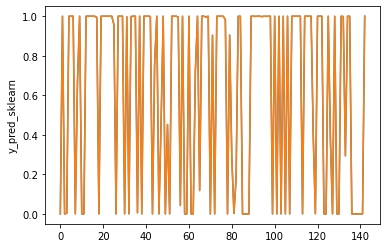

In [58]:
df_y_comparation = pd.DataFrame(data={"y_pred": y_pred[:,1].tolist(), "y_pred_sklearn":y_pred_sklearn[:,1].tolist()})

sns.lineplot(x=np.arange(len(df_y_comparation)), y=df_y_comparation["y_pred"])
sns.lineplot(x=np.arange(len(df_y_comparation)), y=df_y_comparation["y_pred_sklearn"])